<a href="https://colab.research.google.com/github/WesleySiNeves/AprendendoPython/blob/master/Evaluate_Models_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# diretorios

In [10]:
def getDiretorio(tipo):
    retorno = ""
    if(tipo =="MaquinaLocal"):
        retorno = r'D:/Repos/AprendendoPython/Pos_Graduacao_BigData/TCC/Projeto'
    
    if(tipo =="GoogleDrive"):
       retorno=r'/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto'
       
    
    return retorno

In [11]:
diretorio_raiz=""
diretorio_dataset =""
diretorio_imagens_covid =""
diretorio_pneumonia_normal =""
diretorio_pneumonia_pneumonia =""
diretorio_imagens_notebook =""
diretorio_save_imagens_models =""
diretorio_imagens_validacao =""


diretorio_raiz = getDiretorio("GoogleDrive")
diretorio_dataset =r"{0}/{1}".format(diretorio_raiz,'dataset')
diretorio_imagem_covid =r"{0}/{1}".format(diretorio_dataset,'covid')
diretorio_pneumonia_normal =r"{0}/{1}".format(diretorio_dataset,'normal')
diretorio_imagens_validacao =r"{0}/{1}".format(diretorio_dataset,'validacao')
diretorio_imagens_notebook =r"{0}/{1}".format(diretorio_raiz,'Imagens_notebook')
diretorio_save_models =r"{0}/{1}".format(diretorio_raiz,'models')
diretorio_save_model_imagens =r"{0}/{1}".format(diretorio_save_models,'imagens')
print(diretorio_raiz)
print(diretorio_dataset)
print(diretorio_imagem_covid)
print(diretorio_pneumonia_normal)
print(diretorio_imagens_notebook)
print(diretorio_save_models)
print(diretorio_save_model_imagens)
print(diretorio_imagens_validacao)



/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/dataset
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/dataset/covid
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/dataset/normal
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/Imagens_notebook
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/models
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/models/imagens
/content/drive/My Drive/TCC Pos Graduação big data/TCC/Projeto/dataset/validacao


## Bibliotecas

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from imutils import paths
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import pandas as pd
import uuid
import sys
import cv2
import os

## Metodos

In [22]:
def ceildiv(a, b):
    return -(-a // b)

def plots_imagens_in_grid(imagens, figsize=(40,20), rows=5, take =10,  titles=None, maintitle=None,fromFile =True):
    
    tamanho = len(imagens[0:take])
    rows = take // 5
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=16)
    for i in range(tamanho):
        sp = f.add_subplot(rows, ceildiv(tamanho, rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        if(fromFile):
          img = plt.imread(imagens[i])
          plt.imshow(img)
        else:
          img = imagens[i]
          plt.imshow(img)

    

def load_image(full_name,IMAGE_SIZE):
    # load image from file
    image = cv2.imread(full_name)

    if(image is None):
      return None
      
    # convert to RGB, if needed
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,IMAGE_SIZE)
    # convert to array
    return image

def get_imagens_from_diretory(diretorio):
  return list(paths.list_images(diretorio))


def get_labels(tupla, categorical=True):
  lb = LabelBinarizer()
  itens = [item[0] for item in tupla]
  itens = np.array(itens)
  itens = lb.fit_transform(itens)

  if(categorical):
    itens = to_categorical(itens)
  
  return itens,lb.classes_


def get_imagens(tupla):

  lista =[item[1] for item in tupla]

  lista = np.array(lista) / 255.0

  return lista

## Load Imagens

In [14]:
imagens_covid = get_imagens_from_diretory(diretorio_imagem_covid)

imagens_normal = get_imagens_from_diretory(diretorio_pneumonia_normal)

imagens_validacao_covid = get_imagens_from_diretory("{0}/{1}".format(diretorio_imagens_validacao,"covid"))
imagens_validacao_normal = get_imagens_from_diretory("{0}/{1}".format(diretorio_imagens_validacao,"normal"))


print("Imagens  Normal {0}".format(len(imagens_normal)))

print("Imagens  Covid {0}".format(len(imagens_covid)))

print(len(imagens_validacao_normal))
print(len(imagens_validacao_covid))


Imagens  Normal 671
Imagens  Covid 669
50
50


In [25]:
IMAGE_SIZE = (150,150)

labels =[]
lista_imagens_erro = []
lista_imagens_com_Covid = []
lista_imagens_normal = []
lista_imagens_validacao_normal = []
lista_imagens_validacao_covid = []
lista_tuplas_imagens =[]


In [26]:
inicio = dt.datetime.now()

## imagens com Covid
# IMAGE_SIZE = config_VGG16.IMAGE_SIZE

lista_imagens_com_Covid = []
for item in imagens_covid:
    image =  load_image(item,IMAGE_SIZE)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is None):
        lista_imagens_erro.append(item)
    else:
        lista_tuplas_imagens.append((prognostico,image))
        lista_imagens_com_Covid.append(item)
  
## imagens Normais
lista_imagens_normal = []
for item in imagens_normal:
    image =  load_image(item,IMAGE_SIZE)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is None):
        lista_imagens_erro.append(item)
    else:
        lista_tuplas_imagens.append((prognostico,image))
        lista_imagens_normal.append(item)


## imagens de Validação
lista_imagens_validacao_normal = []

for item in imagens_validacao_normal:
    image =  load_image(item,IMAGE_SIZE)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is None):
        lista_imagens_erro.append(item)
    else:
        lista_imagens_validacao_normal.append(item)

lista_imagens_validacao_covid =[]

for item in imagens_validacao_covid:
    image =  load_image(item,IMAGE_SIZE)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is None):
        lista_imagens_erro.append(item)
    else:
      lista_imagens_validacao_covid.append(item)
      


## recupera as imagens para validação posterior
tupla_imagens_validacao =[]

for item in imagens_validacao_covid:
    image =  load_image(item,IMAGE_SIZE)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is not None):
        tupla_imagens_validacao.append((prognostico,image))
    

for item in imagens_validacao_normal:
    image =  load_image(item,IMAGE_SIZE)
    prognostico = item.split(os.path.sep)[-2]
    prognostico = str(prognostico).lower()
    if(image is not None):
        tupla_imagens_validacao.append((prognostico,image))


duracao = dt.datetime.now()-inicio 

print('A duração do processamento foi de', str(duracao)[:str(duracao).find('.')]) 


A duração do processamento foi de 0:06:10


Plot imagens

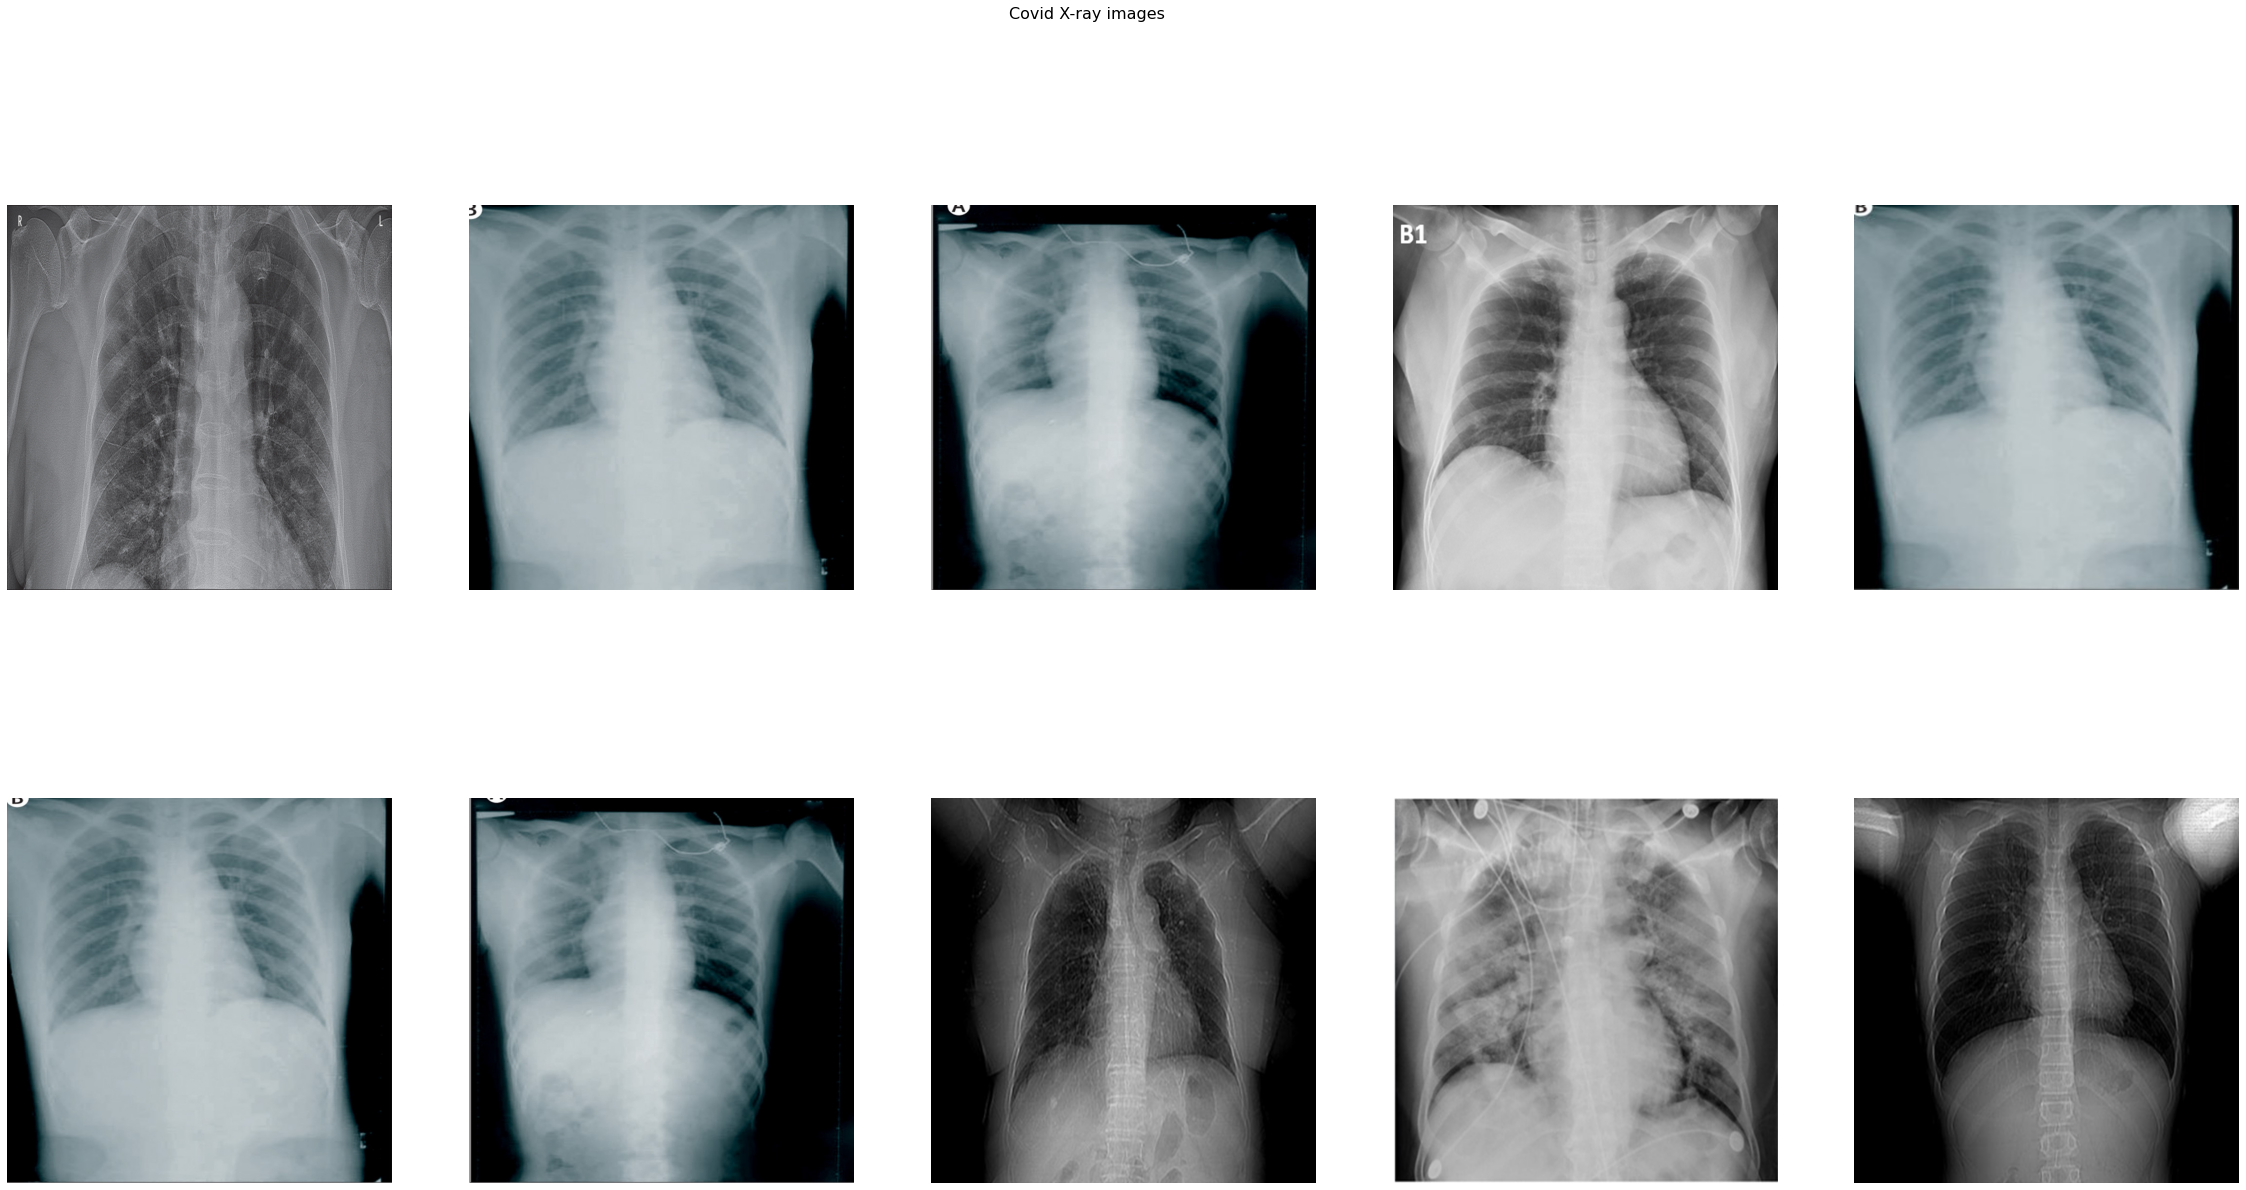

In [29]:
plots_imagens_in_grid(lista_imagens_com_Covid, rows=5, maintitle="Covid X-ray images",fromFile=True)

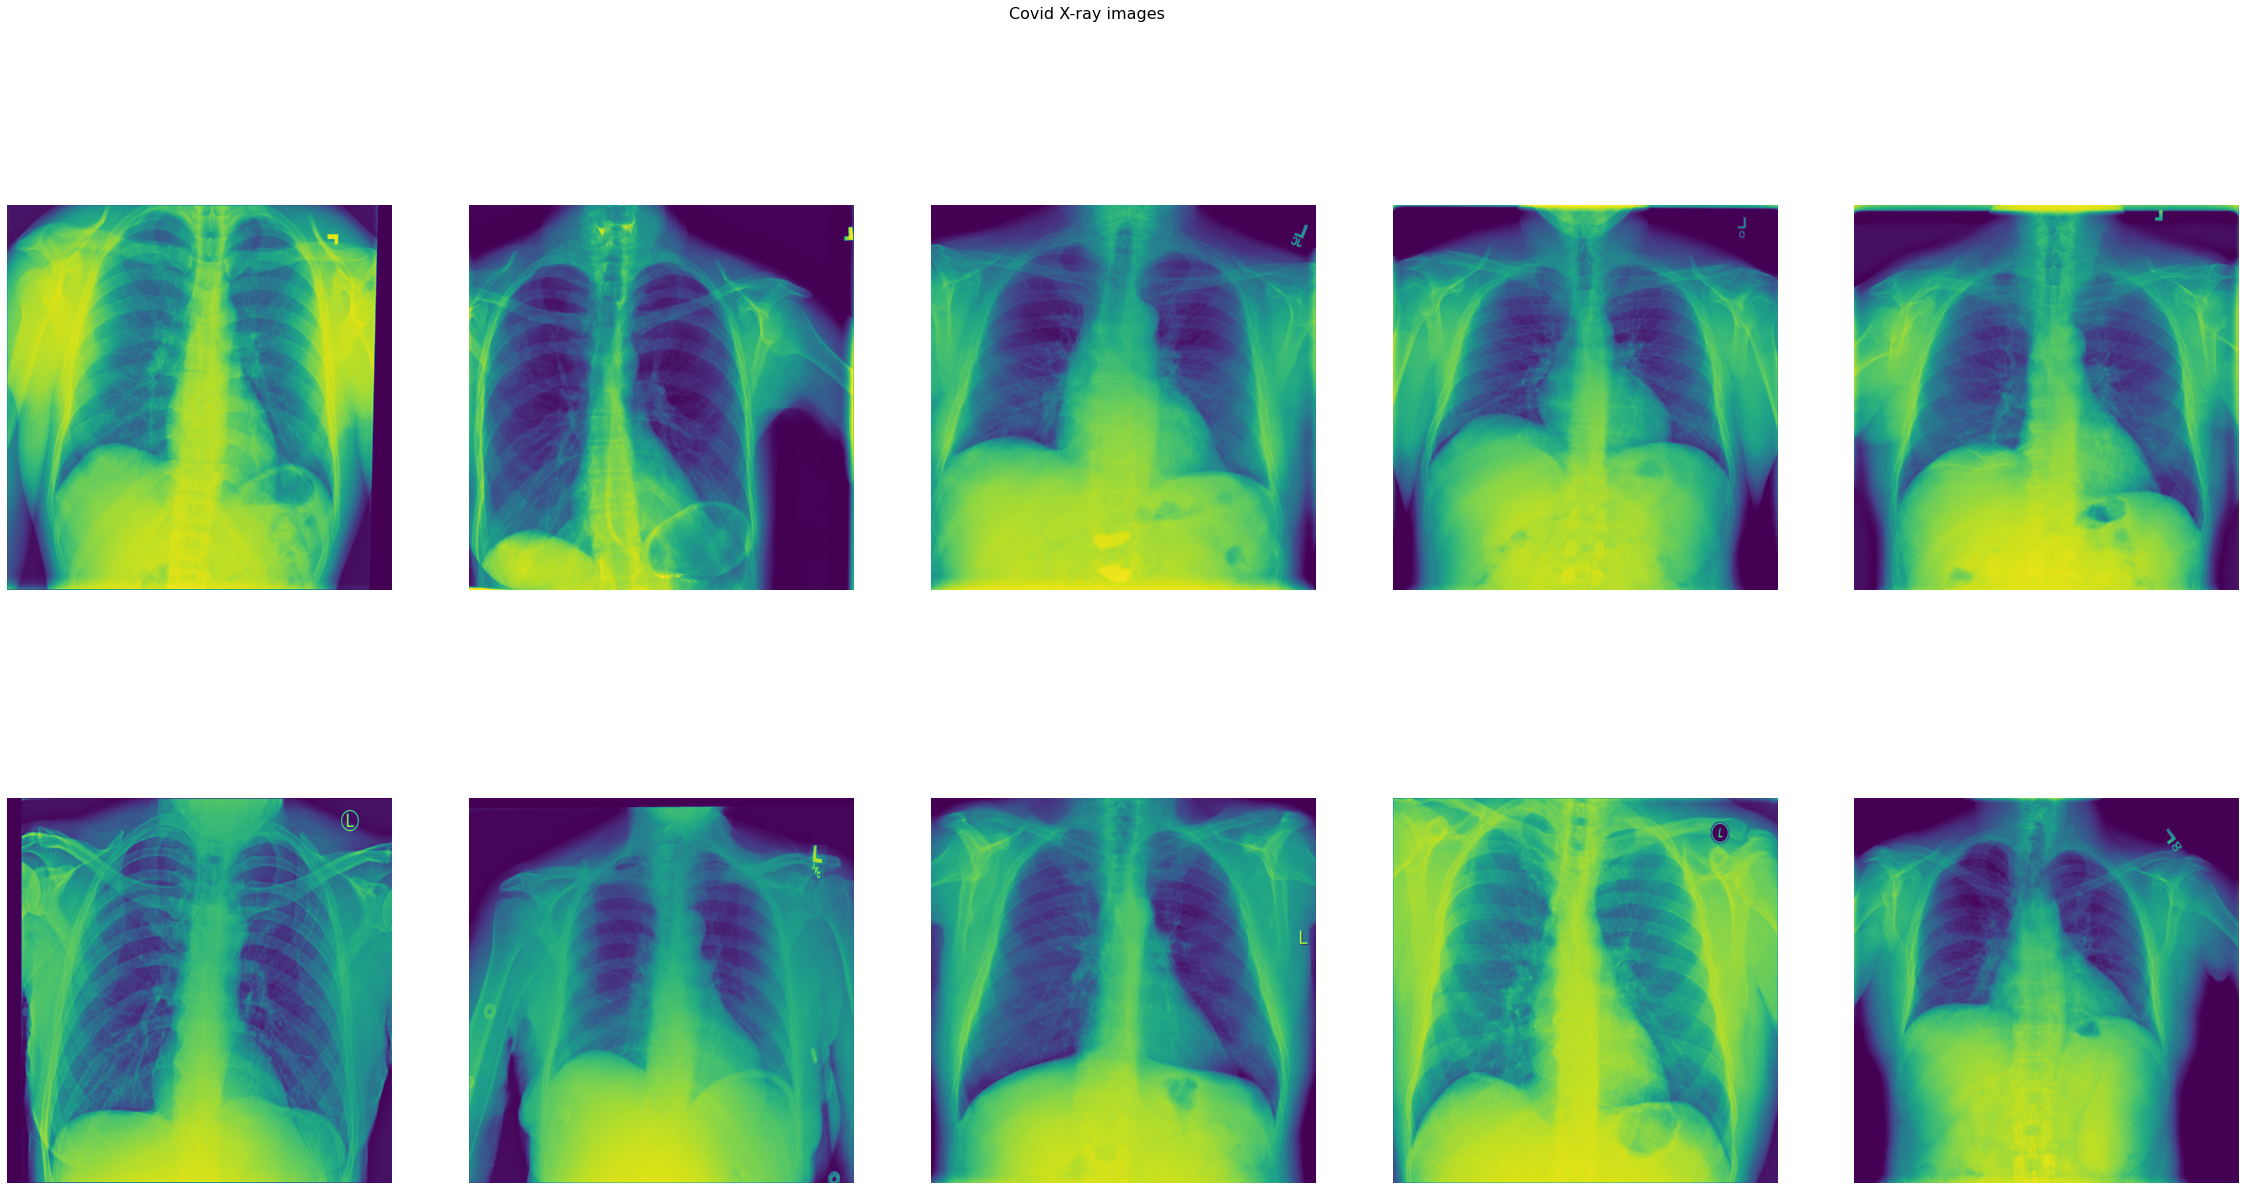

In [28]:
plots_imagens_in_grid(lista_imagens_normal, rows=5, maintitle="images não covid",fromFile=True)

## Medotos auxiliares

In [31]:
import seaborn as sns
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# plot_multiclass_roc(testY, predY, n_classes=3, figsize=(16, 10))

In [32]:
def load_image(var_imagem,size =None):

    if(size is None):
      size = (224, 224)

    image = cv2.imread(var_imagem)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, size)
    imagem_array = np.expand_dims(image, axis = 0)

    return imagem_array,image


def plot_predition(pred,image):
  categorias_predicao = ['covid', 'normal']
  
  predicao = categorias_predicao[np.argmax(pred)]

  plt.title(predicao)
    
  plt.imshow(image/255.)
  plt.savefig('Predition_plot.png')

def plot_imagens_predition(model,testX,testY,config, take=60):
  labels=['covid','normal']
  plt.figure(figsize =(40,40))
  
  predIdxs = get_predsIdxsX(model,testX,config.BS)

  for i in range(take):
      plt.subplot(10,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.title("{0}-{1}".format(i,labels[(np.argmax(testY[i], axis=0))]),fontsize=14)
      # plt.imshow(trainX.reshape(-1,224,224,3)[i])
      plt.imshow(testX.reshape(-1,224,224,3)[i])
      
      

      if(predIdxs[i]==(np.argmax(testY[i], axis=0))):
        plt.xlabel(labels[predIdxs[i]],color='blue',fontsize=14)
      else:
        plt.xlabel(labels[predIdxs[i]],color='red',fontsize=14)
          
  plt.show()


## Ler o Excel

In [33]:
full_save_excel = r"{0}/{1}/{2}.xlsx".format(diretorio_raiz,"Excel","Versões")

diretoriosModelos = 



In [36]:
df_modelos = pd.read_excel(full_save_excel)

df_modelos.head()

,NomeModelo,EPOCHS,INIT_LR,BS,IMAGE_SIZE,Descricao,DataCriacao,TotalImagens,QtdImgCovid,QtdImgNormal,QtdImgTrainX,QtdImgTestX,QtdImgTrainY,QtdImgTestY,Rotation_range,Fill_mode,Test_size,TipoCNN,Versao,UseTransferLearning,UseDataAugmentation,UseCallbaks,UseFreeze,UseFineTuning,UseFeatureExtractor,Acuracia,Sensitividade,Especificidade,Acuracia_Val,Sensitividade_Val,Especificidade_Val
0,Model_VGG16_100_EPOCHS_16_BS_0.9129_ACC_0.9300...,100,0.001,16,"(150, 150)",NaN,2020-07-09 14:14:01.523,1340,669,671,938,402,938,402,15,nearest,0.3,VGG16,V3,True,True,True,True,False,True,0.9129,0.8905,0.9353,0.93,0.90,0.96
1,Model_VGG16_100_EPOCHS_16_BS_0.9154_ACC_0.9000...,100,0.001,16,"(150, 150)",NaN,2020-07-09 10:19:48.202,1340,669,671,938,402,938,402,15,nearest,0.3,VGG16,V3,True,True,True,True,False,True,0.9154,0.8905,0.9403,0.90,0.84,0.96
2,Model_ResNet50_100_EPOCHS_16_BS_0.9328_ACC_0.9...,100,0.001,16,"(150, 150)",NaN,2020-07-08 11:13:15.293,1340,669,671,938,402,938,402,15,nearest,0.3,ResNet50,V3,True,True,True,False,False,True,0.9328,0.9502,0.9154,0.97,1.00,0.94
3,Model_ResNet101_100_EPOCHS_16_BS_0.8980_ACC_0....,100,0.001,16,"(150, 150)",NaN,2020-07-08 00:28:58.899,1340,669,671,938,402,938,402,15,nearest,0.3,ResNet101,V3,True,True,True,False,False,True,0.8980,0.9801,0.8159,0.92,1.00,0.84
4,Model_ResNet50_100_EPOCHS_16_BS_0.8700_ACC_0.9...,100,0.001,16,"(150, 150)",NaN,2020-07-08 00:28:58.899,1340,669,671,938,402,938,402,15,nearest,0.3,ResNet50,V3,True,True,True,True,True,True,0.8700,0.8400,0.9000,0.97,1.00,0.94


In [60]:
df_modelos = pd.read_excel(full_save_excel)

dados_resumo = df_modelos[["NomeModelo","TipoCNN","EPOCHS","TotalImagens","Versao","UseCallbaks","UseFreeze","UseFineTuning","Acuracia","Acuracia_Val","Sensitividade","Especificidade"]]

dados_resumo

,NomeModelo,TipoCNN,EPOCHS,TotalImagens,Versao,UseCallbaks,UseFreeze,UseFineTuning,Acuracia,Acuracia_Val,Sensitividade,Especificidade
0,Model_VGG16_100_EPOCHS_16_BS_0.9129_ACC_0.9300...,VGG16,100,1340,V3,True,True,False,0.9129,0.93,0.8905,0.9353
1,Model_VGG16_100_EPOCHS_16_BS_0.9154_ACC_0.9000...,VGG16,100,1340,V3,True,True,False,0.9154,0.90,0.8905,0.9403
2,Model_ResNet50_100_EPOCHS_16_BS_0.9328_ACC_0.9...,ResNet50,100,1340,V3,True,False,False,0.9328,0.97,0.9502,0.9154
3,Model_ResNet101_100_EPOCHS_16_BS_0.8980_ACC_0....,ResNet101,100,1340,V3,True,False,False,0.8980,0.92,0.9801,0.8159
4,Model_ResNet50_100_EPOCHS_16_BS_0.8700_ACC_0.9...,ResNet50,100,1340,V3,True,True,True,0.8700,0.97,0.8400,0.9000
5,Model_ResNet50_100_EPOCHS_16_BS_0.9303_ACC_0.9...,ResNet50,100,1340,V3,True,False,False,0.9303,0.97,0.9701,0.8905
6,Model_ResNet101_100_EPOCHS_16_BS_0.9303_ACC_0....,ResNet101,100,1340,V3,True,False,False,0.9303,0.92,0.9851,0.8756
7,Model_ResNet50_100_EPOCHS_32_BS_0.7600_ACC_0.9...,ResNet50,100,1340,V3,True,True,True,0.7600,0.91,0.7400,0.7800
8,Model_ResNet50_100_EPOCHS_16_BS_0.9104_ACC_0.9...,ResNet50,100,1340,V3,True,False,False,0.9104,0.91,0.9701,0.8507
9,Model_ResNet50_100_EPOCHS_16_BS_0.9104_ACC_0.9...,ResNet50,100,1340,V3,True,False,False,0.9104,0.91,0.9701,0.8507


In [61]:
melhores_modelos = dados_resumo.sort_values(['Acuracia', 'Acuracia_Val'], ascending=[False, False]).head(5)



melhores_modelos



,NomeModelo,TipoCNN,EPOCHS,TotalImagens,Versao,UseCallbaks,UseFreeze,UseFineTuning,Acuracia,Acuracia_Val,Sensitividade,Especificidade
2,Model_ResNet50_100_EPOCHS_16_BS_0.9328_ACC_0.9...,ResNet50,100,1340,V3,True,False,False,0.9328,0.97,0.9502,0.9154
5,Model_ResNet50_100_EPOCHS_16_BS_0.9303_ACC_0.9...,ResNet50,100,1340,V3,True,False,False,0.9303,0.97,0.9701,0.8905
6,Model_ResNet101_100_EPOCHS_16_BS_0.9303_ACC_0....,ResNet101,100,1340,V3,True,False,False,0.9303,0.92,0.9851,0.8756
1,Model_VGG16_100_EPOCHS_16_BS_0.9154_ACC_0.9000...,VGG16,100,1340,V3,True,True,False,0.9154,0.90,0.8905,0.9403
0,Model_VGG16_100_EPOCHS_16_BS_0.9129_ACC_0.9300...,VGG16,100,1340,V3,True,True,False,0.9129,0.93,0.8905,0.9353


## Evaluate

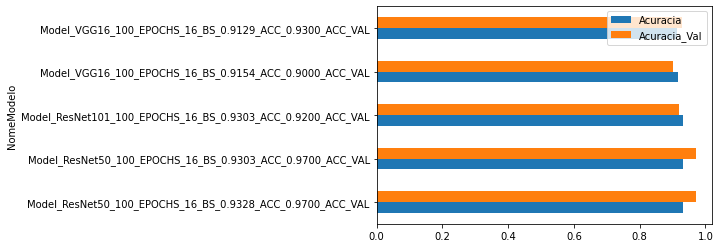

In [64]:

ax = plt.gca()

melhores_modelos.plot(kind='barh',x='NomeModelo',y=['Acuracia','Acuracia_Val'],ax=ax)

plt.show()

In [57]:


for i ,row in  melhores_modelos[["Versao","NomeModelo"]].iterrows():

  print(row["Versao"],row["NomeModelo"])

V3 Model_ResNet50_100_EPOCHS_16_BS_0.9328_ACC_0.9700_ACC_VAL
V3 Model_ResNet50_100_EPOCHS_16_BS_0.9303_ACC_0.9700_ACC_VAL
V3 Model_ResNet101_100_EPOCHS_16_BS_0.9303_ACC_0.9200_ACC_VAL
V3 Model_VGG16_100_EPOCHS_16_BS_0.9154_ACC_0.9000_ACC_VAL
V3 Model_VGG16_100_EPOCHS_16_BS_0.9129_ACC_0.9300_ACC_VAL


In [ ]:
from tensorflow.keras.models import load_model

new_VGG16Model = load_model(model_save_VGG16)


new_Xception = load_model(model_save_InceptionV3)